<a href="https://colab.research.google.com/github/iashyam/Machine-Learning-First-Repo/blob/main/The_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=columns)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#separate label and features
X = data.drop('species', axis=1)
y = data['species']

map = {name:index for index, name in enumerate(y.unique())}
y = y.map(map)

#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
X_train, X_last, y_train, y_last = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)



In [5]:
map = {name:index for index, name in enumerate(y.unique())}
y.map(map)

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
def plot_history(history):

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rc('figure', autolayout=True)
    plt.rcParams['font.family'] = 'serif'
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Traning Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('epochs')
    plt.title('Accuracy')
    plt.legend()
    plt.style.use('ggplot')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Traning Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('epochs')
    plt.title('Loss Function')
    plt.legend();



class NeuralNetwork(Sequential):

    def __init__(self, input_shape:int,hidden_layer:list, output_shape:int):
        super().__init__()

        self.add(Input(shape=(input_shape,)))
        for layer in hidden_layer:
            self.add(Dense(layer, activation='relu'))

        self.add(Dense(output_shape, activation='softmax'))

    def compile_model(self):
        self.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    def train_model(self, epochs:int, batch_size:int, X_train, y_train, x_test, y_test):
        history = self.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
        return history


In [7]:
architecture = [32, 16]
input_shape = X_train.shape[1]

model = NeuralNetwork(input_shape=input_shape, hidden_layer=architecture, output_shape=y_train.nunique())
model.compile_model()

history = model.train_model(epochs=150, batch_size=12, X_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3897 - loss: 1.0760 - val_accuracy: 0.2000 - val_loss: 1.1172
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3841 - loss: 0.9964 - val_accuracy: 0.2000 - val_loss: 1.0215
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3662 - loss: 0.9659 - val_accuracy: 0.5333 - val_loss: 0.9703
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6742 - loss: 0.9162 - val_accuracy: 0.5667 - val_loss: 0.9526
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6999 - loss: 0.8610 - val_accuracy: 0.5667 - val_loss: 0.9084
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7210 - loss: 0.8163 - val_accuracy: 0.5667 - val_loss: 0.8541
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6794 - loss: 0.7942 - val_accuracy: 0.5667 - val_loss: 0.8191
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7289 - loss: 0.7369 - val_accuracy: 0

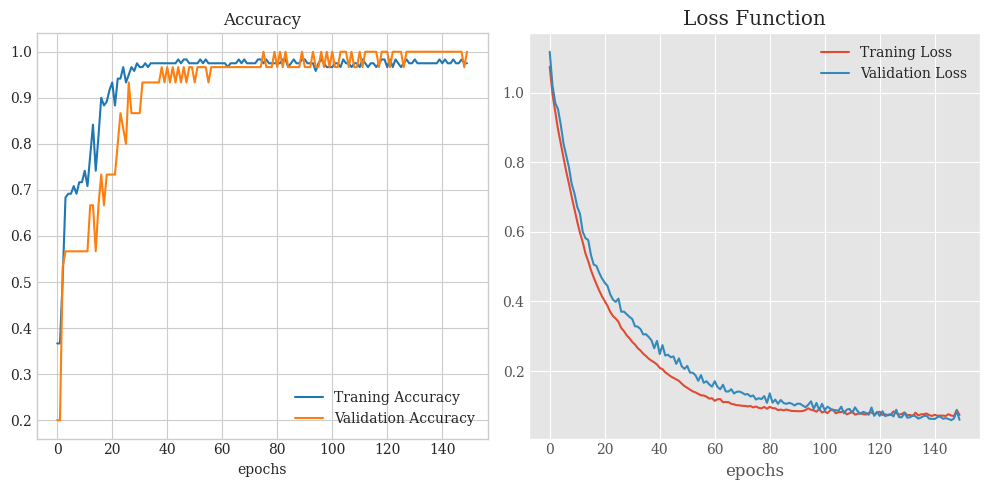

In [8]:
plot_history(history)

In [9]:
predictions = model.predict(X_last)
y_pred = predictions.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


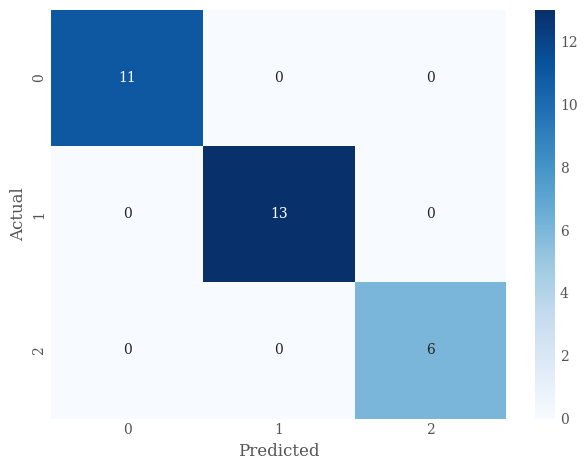

In [10]:
confusion_mat = confusion_matrix(y_last, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
model.evaluate(X_last, y_last)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0598


[0.05976933613419533, 1.0]

This model shows one hundred percent accuracy. Which is quite unnatural to be honest. But given the less number of features and great number of data, this is quite reasonbale. We can see that training a neural network with a huge amount of data can give us very accurate predictions.

Thank you very much!